In [1]:
import os
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
electric_data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/범일/electricData.xlsx")

In [3]:
water_data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/범일/waterData.xlsx")

In [4]:
electric_data.head()

,house,2023-06-01 00:00:00,2023-06-01 06:00:00,2023-06-01 12:00:00,2023-06-01 18:00:00,2023-06-02 00:00:00,2023-06-02 06:00:00,2023-06-02 12:00:00,2023-06-02 18:00:00,2023-06-03 00:00:00,...,2023-08-29 12:00:00,2023-08-29 18:00:00,2023-08-30 00:00:00,2023-08-30 06:00:00,2023-08-30 12:00:00,2023-08-30 18:00:00,2023-08-31 00:00:00,2023-08-31 06:00:00,2023-08-31 12:00:00,2023-08-31 18:00:00
0,1호,1.23,1.45,1.73,1.62,1.31,1.48,1.74,1.71,1.30,...,1.66,1.64,1.27,1.29,1.69,1.57,1.26,1.36,1.64,1.59
1,2호,1.35,1.35,1.35,1.34,1.36,1.42,1.41,1.38,1.36,...,1.59,1.48,1.41,1.47,1.54,1.48,1.41,1.47,1.64,1.51
2,3호,1.36,1.44,1.42,1.36,1.36,1.42,1.43,1.39,1.32,...,1.64,1.79,1.34,1.35,1.46,1.49,1.35,1.42,1.47,1.36
3,4호,1.23,1.44,1.73,1.61,1.33,1.47,1.73,1.71,1.32,...,1.73,1.71,1.32,1.49,1.94,1.68,1.23,1.39,1.65,1.61
4,5호,1.22,1.35,1.67,1.57,1.31,1.48,1.73,1.76,1.33,...,1.66,1.64,1.27,1.29,1.69,1.57,1.26,1.36,1.64,1.59


In [5]:
water_data.head()

,house,2023-06-01 00:00:00,2023-06-01 06:00:00,2023-06-01 12:00:00,2023-06-01 18:00:00,2023-06-02 00:00:00,2023-06-02 06:00:00,2023-06-02 12:00:00,2023-06-02 18:00:00,2023-06-03 00:00:00,...,2023-08-29 12:00:00,2023-08-29 18:00:00,2023-08-30 00:00:00,2023-08-30 06:00:00,2023-08-30 12:00:00,2023-08-30 18:00:00,2023-08-31 00:00:00,2023-08-31 06:00:00,2023-08-31 12:00:00,2023-08-31 18:00:00
0,1호,30,120,210,410,32,184,180,260,35,...,190,230,98,143,253,198,78,159,169,147
1,2호,58,218,290,105,10,68,38,263,78,...,214,247,53,160,210,150,39,120,147,110
2,3호,28,184,150,38,62,151,140,145,78,...,210,150,69,169,251,169,47,157,230,169
3,4호,14,169,89,55,55,130,135,138,28,...,180,260,14,145,203,216,55,136,189,84
4,5호,47,260,58,169,110,198,89,121,14,...,180,260,14,145,203,216,55,136,189,84


In [6]:
electric_data.dropna(axis=0,inplace=True)

In [7]:
electric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Columns: 369 entries, house to 2023-08-31 18:00:00
dtypes: float64(368), object(1)
memory usage: 2.8+ MB


In [8]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 369 entries, house to 2023-08-31 18:00:00
dtypes: int64(368), object(1)
memory usage: 2.8+ MB


In [9]:
electric_house=electric_data['house']
water_house=water_data['house']

In [10]:
electric_data.drop(['house'],axis=1,inplace=True)
water_data.drop(['house'],axis=1,inplace=True)

In [11]:
electric_data_tr=electric_data.transpose()

In [12]:
water_data_tr=water_data.transpose()

In [13]:
electric_data_tr

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-06-01 00:00:00,1.23,1.35,1.36,1.23,1.22,1.23,1.33,1.37,1.44,1.23,...,1.45,1.27,1.43,1.48,1.24,1.45,1.29,1.44,1.23,1.45
2023-06-01 06:00:00,1.45,1.35,1.44,1.44,1.35,1.45,1.44,1.43,1.64,1.43,...,1.71,1.88,1.48,1.74,1.24,1.73,1.69,1.64,1.45,1.64
2023-06-01 12:00:00,1.73,1.35,1.42,1.73,1.67,1.73,1.45,1.65,1.55,1.72,...,1.63,1.71,1.59,1.75,1.24,1.62,1.57,1.55,1.73,1.79
2023-06-01 18:00:00,1.62,1.34,1.36,1.61,1.57,1.62,1.59,1.79,1.45,1.62,...,1.24,1.25,1.33,1.30,1.24,1.31,1.26,1.45,1.62,1.34
2023-06-02 00:00:00,1.31,1.36,1.36,1.33,1.31,1.31,1.36,1.35,1.56,1.31,...,1.41,1.29,1.48,1.49,1.25,1.48,1.36,1.56,1.31,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 18:00:00,1.57,1.48,1.49,1.68,1.57,1.79,1.61,1.74,1.46,1.57,...,1.35,1.37,1.44,1.34,1.36,1.44,1.35,1.25,1.23,1.44
2023-08-31 00:00:00,1.26,1.41,1.35,1.23,1.26,1.36,1.36,1.35,1.35,1.26,...,1.48,1.43,1.64,1.46,1.45,1.64,1.43,1.45,1.24,1.64
2023-08-31 06:00:00,1.36,1.47,1.42,1.39,1.36,1.35,1.31,1.43,1.34,1.36,...,1.74,1.65,1.51,1.93,1.69,1.54,1.69,1.73,1.26,1.53
2023-08-31 12:00:00,1.64,1.64,1.47,1.65,1.64,1.48,1.46,1.69,1.48,1.64,...,1.75,1.79,1.46,1.66,1.79,1.46,1.75,1.62,1.57,1.45


In [14]:
#electric_data_tr= electric_data_tr/electric_data_tr.abs().max()

In [15]:
water_data_tr

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-06-01 00:00:00,30,58,28,14,47,35,78,45,48,47,...,214,183,98,35,58,188,188,218,43,10
2023-06-01 06:00:00,120,218,184,169,260,198,315,298,160,122,...,247,190,143,145,218,95,95,350,136,68
2023-06-01 12:00:00,210,290,150,89,58,55,182,190,210,218,...,53,138,253,203,290,46,46,38,189,38
2023-06-01 18:00:00,410,105,38,55,169,290,140,51,150,350,...,160,140,198,216,105,139,139,183,84,263
2023-06-02 00:00:00,32,10,62,55,110,78,45,68,69,38,...,210,0,78,43,10,214,214,190,54,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 18:00:00,198,150,169,216,216,110,350,169,145,147,...,68,110,241,216,141,122,145,160,160,158
2023-08-31 00:00:00,78,39,47,55,55,87,38,47,68,58,...,141,32,48,43,188,218,203,210,198,290
2023-08-31 06:00:00,159,120,157,136,136,159,183,157,141,218,...,188,184,160,136,95,350,216,150,140,300
2023-08-31 12:00:00,169,147,230,189,189,210,190,230,188,290,...,95,180,210,189,44,110,55,39,47,280


In [16]:
elec_data = []
for i in range(len(electric_data_tr)-5):
  elec_data.append(electric_data_tr[i:i+5])
elec_data = np.array(elec_data)
elec_data.shape

(363, 5, 1000)

In [17]:
water_data = []
for i in range(len(electric_data_tr)-5):
  water_data.append(electric_data_tr[i:i+5])
water_data = np.array(water_data)
water_data.shape

(363, 5, 1000)

In [18]:
elec_data

array([[[1.23, 1.35, 1.36, ..., 1.44, 1.23, 1.45],
        [1.45, 1.35, 1.44, ..., 1.64, 1.45, 1.64],
        [1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34],
        [1.31, 1.36, 1.36, ..., 1.56, 1.31, 1.35]],

       [[1.45, 1.35, 1.44, ..., 1.64, 1.45, 1.64],
        [1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34],
        [1.31, 1.36, 1.36, ..., 1.56, 1.31, 1.35],
        [1.48, 1.42, 1.42, ..., 1.45, 1.48, 1.46]],

       [[1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34],
        [1.31, 1.36, 1.36, ..., 1.56, 1.31, 1.35],
        [1.48, 1.42, 1.42, ..., 1.45, 1.48, 1.46],
        [1.74, 1.41, 1.43, ..., 1.71, 1.74, 1.49]],

       ...,

       [[1.27, 1.41, 1.34, ..., 1.35, 1.45, 1.45],
        [1.29, 1.47, 1.35, ..., 1.46, 1.73, 1.69],
        [1.69, 1.54, 1.46, ..., 1.49, 1.62, 1.74],
        [1.57, 1.48, 1.49, ..., 1.25, 1.23, 1.44],
        [1.2

In [19]:
elec_data[:,:-1]

array([[[1.23, 1.35, 1.36, ..., 1.44, 1.23, 1.45],
        [1.45, 1.35, 1.44, ..., 1.64, 1.45, 1.64],
        [1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34]],

       [[1.45, 1.35, 1.44, ..., 1.64, 1.45, 1.64],
        [1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34],
        [1.31, 1.36, 1.36, ..., 1.56, 1.31, 1.35]],

       [[1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34],
        [1.31, 1.36, 1.36, ..., 1.56, 1.31, 1.35],
        [1.48, 1.42, 1.42, ..., 1.45, 1.48, 1.46]],

       ...,

       [[1.27, 1.41, 1.34, ..., 1.35, 1.45, 1.45],
        [1.29, 1.47, 1.35, ..., 1.46, 1.73, 1.69],
        [1.69, 1.54, 1.46, ..., 1.49, 1.62, 1.74],
        [1.57, 1.48, 1.49, ..., 1.25, 1.23, 1.44]],

       [[1.29, 1.47, 1.35, ..., 1.46, 1.73, 1.69],
        [1.69, 1.54, 1.46, ..., 1.49, 1.62, 1.74],
        [1.57, 1.48, 1.49, ..., 1.25, 1.23, 1.44],
        [1

In [20]:
elec_data[0:,0:,[0]]

array([[[1.23],
        [1.45],
        [1.73],
        [1.62],
        [1.31]],

       [[1.45],
        [1.73],
        [1.62],
        [1.31],
        [1.48]],

       [[1.73],
        [1.62],
        [1.31],
        [1.48],
        [1.74]],

       ...,

       [[1.27],
        [1.29],
        [1.69],
        [1.57],
        [1.26]],

       [[1.29],
        [1.69],
        [1.57],
        [1.26],
        [1.36]],

       [[1.69],
        [1.57],
        [1.26],
        [1.36],
        [1.64]]])

In [21]:
elec_data[0:,0:,[1]]

array([[[1.35],
        [1.35],
        [1.35],
        [1.34],
        [1.36]],

       [[1.35],
        [1.35],
        [1.34],
        [1.36],
        [1.42]],

       [[1.35],
        [1.34],
        [1.36],
        [1.42],
        [1.41]],

       ...,

       [[1.41],
        [1.47],
        [1.54],
        [1.48],
        [1.41]],

       [[1.47],
        [1.54],
        [1.48],
        [1.41],
        [1.47]],

       [[1.54],
        [1.48],
        [1.41],
        [1.47],
        [1.64]]])

In [22]:
elec_label = elec_data[:,-1]

In [23]:
elec_data1 = elec_data[:,:-1]

In [24]:
elec_data1

array([[[1.23, 1.35, 1.36, ..., 1.44, 1.23, 1.45],
        [1.45, 1.35, 1.44, ..., 1.64, 1.45, 1.64],
        [1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34]],

       [[1.45, 1.35, 1.44, ..., 1.64, 1.45, 1.64],
        [1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34],
        [1.31, 1.36, 1.36, ..., 1.56, 1.31, 1.35]],

       [[1.73, 1.35, 1.42, ..., 1.55, 1.73, 1.79],
        [1.62, 1.34, 1.36, ..., 1.45, 1.62, 1.34],
        [1.31, 1.36, 1.36, ..., 1.56, 1.31, 1.35],
        [1.48, 1.42, 1.42, ..., 1.45, 1.48, 1.46]],

       ...,

       [[1.27, 1.41, 1.34, ..., 1.35, 1.45, 1.45],
        [1.29, 1.47, 1.35, ..., 1.46, 1.73, 1.69],
        [1.69, 1.54, 1.46, ..., 1.49, 1.62, 1.74],
        [1.57, 1.48, 1.49, ..., 1.25, 1.23, 1.44]],

       [[1.29, 1.47, 1.35, ..., 1.46, 1.73, 1.69],
        [1.69, 1.54, 1.46, ..., 1.49, 1.62, 1.74],
        [1.57, 1.48, 1.49, ..., 1.25, 1.23, 1.44],
        [1

In [25]:
elec_data1[0:,0:,[0]]

array([[[1.23],
        [1.45],
        [1.73],
        [1.62]],

       [[1.45],
        [1.73],
        [1.62],
        [1.31]],

       [[1.73],
        [1.62],
        [1.31],
        [1.48]],

       ...,

       [[1.27],
        [1.29],
        [1.69],
        [1.57]],

       [[1.29],
        [1.69],
        [1.57],
        [1.26]],

       [[1.69],
        [1.57],
        [1.26],
        [1.36]]])

In [26]:
elec_label.shape

(363, 1000)

In [27]:
elec_label[0:,0]

array([1.31, 1.48, 1.74, 1.71, 1.3 , 1.49, 1.94, 1.68, 1.26, 1.39, 1.69,
       1.61, 1.28, 1.44, 1.77, 1.68, 1.2 , 1.42, 1.88, 1.67, 1.24, 1.39,
       1.67, 1.6 , 1.26, 1.41, 1.68, 1.59, 1.24, 1.4 , 1.67, 1.58, 1.25,
       1.41, 1.77, 1.64, 1.24, 1.38, 1.76, 1.62, 1.27, 1.33, 1.71, 1.6 ,
       1.23, 1.38, 1.47, 1.58, 1.24, 1.39, 1.69, 1.58, 1.26, 1.47, 1.74,
       1.68, 1.24, 1.25, 1.31, 1.29, 1.25, 1.25, 1.25, 1.24, 1.24, 1.31,
       1.59, 1.48, 1.27, 1.33, 1.68, 1.57, 1.23, 1.35, 1.6 , 1.49, 1.26,
       1.34, 1.62, 1.51, 1.24, 1.33, 1.71, 1.59, 1.25, 1.34, 1.59, 1.48,
       1.24, 1.41, 1.48, 1.39, 1.27, 1.34, 1.53, 1.49, 1.23, 1.32, 1.58,
       1.47, 1.24, 1.37, 1.62, 1.49, 1.24, 1.38, 1.27, 1.28, 1.27, 1.34,
       1.41, 1.49, 1.23, 1.35, 1.87, 1.71, 1.19, 1.32, 1.51, 1.43, 1.22,
       1.27, 1.89, 1.77, 1.33, 1.36, 1.69, 1.64, 1.23, 1.26, 1.65, 1.64,
       1.22, 1.29, 1.75, 1.69, 1.26, 1.33, 1.81, 1.75, 1.18, 1.36, 2.06,
       1.89, 1.25, 1.36, 1.95, 1.85, 1.23, 1.31, 1.

In [28]:
for i in range(1000):
  globals()['elec_data{}'.format(i+1)]=elec_data[0:,0:,[i]] #elec_data1, elec_data2 ... elec_data1000

In [29]:
for i in range(1000):
  globals()['elec_data{}'.format(i+1)]=globals()['elec_data{}'.format(i+1)][:,:-1]

In [30]:
elec_data1.shape

(363, 4, 1)

In [31]:
for i in range(1000):
  globals()['elec_label{}'.format(i+1)]=elec_label[0:,i]

In [32]:
elec_label1

array([1.31, 1.48, 1.74, 1.71, 1.3 , 1.49, 1.94, 1.68, 1.26, 1.39, 1.69,
       1.61, 1.28, 1.44, 1.77, 1.68, 1.2 , 1.42, 1.88, 1.67, 1.24, 1.39,
       1.67, 1.6 , 1.26, 1.41, 1.68, 1.59, 1.24, 1.4 , 1.67, 1.58, 1.25,
       1.41, 1.77, 1.64, 1.24, 1.38, 1.76, 1.62, 1.27, 1.33, 1.71, 1.6 ,
       1.23, 1.38, 1.47, 1.58, 1.24, 1.39, 1.69, 1.58, 1.26, 1.47, 1.74,
       1.68, 1.24, 1.25, 1.31, 1.29, 1.25, 1.25, 1.25, 1.24, 1.24, 1.31,
       1.59, 1.48, 1.27, 1.33, 1.68, 1.57, 1.23, 1.35, 1.6 , 1.49, 1.26,
       1.34, 1.62, 1.51, 1.24, 1.33, 1.71, 1.59, 1.25, 1.34, 1.59, 1.48,
       1.24, 1.41, 1.48, 1.39, 1.27, 1.34, 1.53, 1.49, 1.23, 1.32, 1.58,
       1.47, 1.24, 1.37, 1.62, 1.49, 1.24, 1.38, 1.27, 1.28, 1.27, 1.34,
       1.41, 1.49, 1.23, 1.35, 1.87, 1.71, 1.19, 1.32, 1.51, 1.43, 1.22,
       1.27, 1.89, 1.77, 1.33, 1.36, 1.69, 1.64, 1.23, 1.26, 1.65, 1.64,
       1.22, 1.29, 1.75, 1.69, 1.26, 1.33, 1.81, 1.75, 1.18, 1.36, 2.06,
       1.89, 1.25, 1.36, 1.95, 1.85, 1.23, 1.31, 1.

In [33]:
elec_label1.shape

(363,)

In [34]:
LEN_TR = int(elec_label1.shape[0]*0.7)
print('training_data_portion= ', LEN_TR/elec_data1.shape[0])
data_tr = elec_data1[:LEN_TR]
data_te = elec_data1[LEN_TR:]

label_tr = elec_label1[:LEN_TR]
label_te = elec_label1[LEN_TR:]

print(data_tr.shape, data_te.shape, label_tr.shape, label_te.shape)

training_data_portion=  0.699724517906336
(254, 4, 1) (109, 4, 1) (254,) (109,)


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import LearningRateScheduler
print("Installed tensorflow version: ", tf.__version__)

Installed tensorflow version:  2.17.0


In [36]:
winT = 4 # 10sec.
dT = 1  # Sliding window step

##### Build training model
n_steps = winT
n_features = 1

##### Training parameters
MAX_EPOCHS = 200
BATCH_SIZE = 64

lr = 1e-3

In [37]:
def build_model(n_steps, n_feature):
   input_shape = (n_steps, n_features)
   input_layer = layers.Input(shape=input_shape)
   lstm1 = layers.LSTM(128, return_sequences=True)(input_layer)
   lstm1 = layers.LSTM(64, return_sequences=True)(lstm1)
   gru1 = layers.GRU(16)(lstm1)
   output = layers.Dense(1)(gru1)

   model = Model(inputs=input_layer, outputs=output)

   return model

In [38]:
tf.random.set_seed(200)
model = build_model(n_steps,n_features)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 4, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 4, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 16)                  │           3,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,921 (468.44 KB)

 Trainable params: 119,921 (468.44 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae"])

In [40]:
start_s = time.time()
history = model.fit(data_tr,
                    label_tr,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    epochs=MAX_EPOCHS,
                    validation_data=(data_te, label_te))
end_s = time.time()
Elapsed_time = end_s - start_s
print("/n")
print("========== [Info.] Training time:{0:.3f} min.".format(Elapsed_time/60))

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 2.0992 - mae: 1.4331 - val_loss: 1.5489 - val_mae: 1.2287
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.3649 - mae: 1.1490 - val_loss: 0.7994 - val_mae: 0.8733
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6172 - mae: 0.7536 - val_loss: 0.1319 - val_mae: 0.3139
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0813 - mae: 0.2278 - val_loss: 0.1820 - val_mae: 0.3893
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2294 - mae: 0.4428 - val_loss: 0.1768 - val_mae: 0.3822
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1424 - mae: 0.3323 - val_loss: 0.0335 - val_mae: 0.1646
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0416 - mae: 0.1703 - val_loss: 0.0705 - val_mae: 0.1974
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0750 - mae: 0.2061 - val_loss: 0.0810 - val_mae: 0.2188
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0708 - mae:

In [41]:
outputData=model.predict(data_te)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step


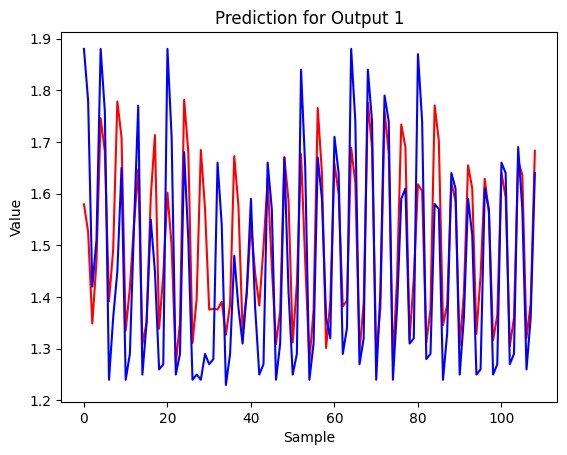

In [42]:
for i in range(1):  # 결과값이 3개인 경우
    plt.figure()
    plt.plot(outputData[:, i], color='red') #빨강 예측
    plt.plot(label_te[:],color='blue') # 파랑 정답
    plt.title(f"Prediction for Output {i+1}")
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.show()

In [43]:
mae_0 =np.mean(np.abs(outputData[:] - label_te[:]))

In [44]:
mae_0

0.2098152830239328

In [45]:
output=model.predict(elec_data1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [46]:
output

array([[1.2895103],
       [1.4805384],
       [1.693137 ],
       [1.5939658],
       [1.3418052],
       [1.484048 ],
       [1.6964769],
       [1.641124 ],
       [1.3014526],
       [1.490782 ],
       [1.8082647],
       [1.6473863],
       [1.3162553],
       [1.4454005],
       [1.6765997],
       [1.5915549],
       [1.3153086],
       [1.468169 ],
       [1.7305112],
       [1.6339722],
       [1.2370028],
       [1.4531593],
       [1.7825968],
       [1.6415058],
       [1.3052642],
       [1.4480667],
       [1.6692541],
       [1.5929575],
       [1.3200907],
       [1.4636955],
       [1.6783925],
       [1.5876296],
       [1.3070123],
       [1.4584262],
       [1.6710474],
       [1.5751566],
       [1.2944582],
       [1.4543582],
       [1.7275783],
       [1.619678 ],
       [1.2885218],
       [1.4372735],
       [1.720146 ],
       [1.6164588],
       [1.3179591],
       [1.4099154],
       [1.697278 ],
       [1.6052213],
       [1.3301057],
       [1.4433119],


In [47]:
electric_data_tr[0]

,0
2023-06-01 00:00:00,1.23
2023-06-01 06:00:00,1.45
2023-06-01 12:00:00,1.73
2023-06-01 18:00:00,1.62
2023-06-02 00:00:00,1.31
...,...
2023-08-30 18:00:00,1.57
2023-08-31 00:00:00,1.26
2023-08-31 06:00:00,1.36
2023-08-31 12:00:00,1.64


In [48]:
electric_data_pre=electric_data_tr.drop(electric_data_tr.index[0:5], axis=0)

In [49]:
electric_data_pre[0]=output

In [50]:
electric_data_pre

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-06-02 06:00:00,1.289510,1.42,1.42,1.47,1.48,1.48,1.43,1.35,1.45,1.48,...,1.48,1.68,1.74,1.94,1.25,1.74,1.64,1.45,1.48,1.46
2023-06-02 12:00:00,1.480538,1.41,1.43,1.73,1.73,1.74,1.48,1.46,1.71,1.74,...,1.39,1.51,1.71,1.68,1.24,1.71,1.59,1.71,1.74,1.49
2023-06-02 18:00:00,1.693137,1.38,1.39,1.71,1.76,1.71,1.59,1.49,1.63,1.71,...,1.27,1.24,1.35,1.24,1.23,1.30,1.48,1.63,1.71,1.33
2023-06-03 00:00:00,1.593966,1.36,1.32,1.32,1.33,1.36,1.33,1.25,1.34,1.31,...,1.34,1.25,1.35,1.25,1.24,1.49,1.72,1.34,1.32,1.44
2023-06-03 06:00:00,1.341805,1.42,1.41,1.49,1.44,1.39,1.48,1.45,1.31,1.49,...,1.53,1.24,1.48,1.31,1.26,1.94,1.63,1.31,1.49,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 18:00:00,1.665250,1.48,1.49,1.68,1.57,1.79,1.61,1.74,1.46,1.57,...,1.35,1.37,1.44,1.34,1.36,1.44,1.35,1.25,1.23,1.44
2023-08-31 00:00:00,1.635824,1.41,1.35,1.23,1.26,1.36,1.36,1.35,1.35,1.26,...,1.48,1.43,1.64,1.46,1.45,1.64,1.43,1.45,1.24,1.64
2023-08-31 06:00:00,1.320831,1.47,1.42,1.39,1.36,1.35,1.31,1.43,1.34,1.36,...,1.74,1.65,1.51,1.93,1.69,1.54,1.69,1.73,1.26,1.53
2023-08-31 12:00:00,1.386348,1.64,1.47,1.65,1.64,1.48,1.46,1.69,1.48,1.64,...,1.75,1.79,1.46,1.66,1.79,1.46,1.75,1.62,1.57,1.45


In [51]:
electric_data_pre_tr=electric_data_pre.transpose()

In [52]:
electric_data_pre_tr

,2023-06-02 06:00:00,2023-06-02 12:00:00,2023-06-02 18:00:00,2023-06-03 00:00:00,2023-06-03 06:00:00,2023-06-03 12:00:00,2023-06-03 18:00:00,2023-06-04 00:00:00,2023-06-04 06:00:00,2023-06-04 12:00:00,...,2023-08-29 12:00:00,2023-08-29 18:00:00,2023-08-30 00:00:00,2023-08-30 06:00:00,2023-08-30 12:00:00,2023-08-30 18:00:00,2023-08-31 00:00:00,2023-08-31 06:00:00,2023-08-31 12:00:00,2023-08-31 18:00:00
0,1.28951,1.480538,1.693137,1.593966,1.341805,1.484048,1.696477,1.641124,1.301453,1.490782,...,1.364628,1.640662,1.592953,1.304908,1.35998,1.66525,1.635824,1.320831,1.386348,1.683008
1,1.42000,1.410000,1.380000,1.360000,1.420000,1.480000,1.390000,1.360000,1.440000,1.420000,...,1.590000,1.480000,1.410000,1.470000,1.54000,1.48000,1.410000,1.470000,1.640000,1.510000
2,1.42000,1.430000,1.390000,1.320000,1.410000,1.490000,1.410000,1.230000,1.450000,1.730000,...,1.640000,1.790000,1.340000,1.350000,1.46000,1.49000,1.350000,1.420000,1.470000,1.360000
3,1.47000,1.730000,1.710000,1.320000,1.490000,1.940000,1.680000,1.230000,1.390000,1.650000,...,1.730000,1.710000,1.320000,1.490000,1.94000,1.68000,1.230000,1.390000,1.650000,1.610000
4,1.48000,1.730000,1.760000,1.330000,1.440000,1.930000,1.580000,1.260000,1.380000,1.690000,...,1.660000,1.640000,1.270000,1.290000,1.69000,1.57000,1.260000,1.360000,1.640000,1.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.74000,1.710000,1.300000,1.490000,1.940000,1.680000,1.260000,1.390000,1.690000,1.610000,...,1.680000,1.360000,1.430000,1.660000,1.79000,1.44000,1.640000,1.540000,1.460000,1.340000
996,1.64000,1.590000,1.480000,1.720000,1.630000,1.370000,1.430000,1.650000,1.790000,1.350000,...,1.460000,1.360000,1.450000,1.690000,1.79000,1.35000,1.430000,1.690000,1.750000,1.440000
997,1.45000,1.710000,1.630000,1.340000,1.310000,1.480000,1.540000,1.370000,1.410000,1.640000,...,1.790000,1.350000,1.350000,1.460000,1.49000,1.25000,1.450000,1.730000,1.620000,1.350000
998,1.48000,1.740000,1.710000,1.320000,1.490000,1.940000,1.680000,1.360000,1.430000,1.660000,...,1.490000,1.250000,1.450000,1.730000,1.62000,1.23000,1.240000,1.260000,1.570000,1.340000


In [54]:
electric_house

,house
0,1호
1,2호
2,3호
3,4호
4,5호
...,...
995,996호
996,997호
997,998호
998,999호


In [55]:
electric_data_pre_tr.insert(loc=0, column='house', value=electric_house)

In [56]:
electric_data_pre_tr

,house,2023-06-02 06:00:00,2023-06-02 12:00:00,2023-06-02 18:00:00,2023-06-03 00:00:00,2023-06-03 06:00:00,2023-06-03 12:00:00,2023-06-03 18:00:00,2023-06-04 00:00:00,2023-06-04 06:00:00,...,2023-08-29 12:00:00,2023-08-29 18:00:00,2023-08-30 00:00:00,2023-08-30 06:00:00,2023-08-30 12:00:00,2023-08-30 18:00:00,2023-08-31 00:00:00,2023-08-31 06:00:00,2023-08-31 12:00:00,2023-08-31 18:00:00
0,1호,1.28951,1.480538,1.693137,1.593966,1.341805,1.484048,1.696477,1.641124,1.301453,...,1.364628,1.640662,1.592953,1.304908,1.35998,1.66525,1.635824,1.320831,1.386348,1.683008
1,2호,1.42000,1.410000,1.380000,1.360000,1.420000,1.480000,1.390000,1.360000,1.440000,...,1.590000,1.480000,1.410000,1.470000,1.54000,1.48000,1.410000,1.470000,1.640000,1.510000
2,3호,1.42000,1.430000,1.390000,1.320000,1.410000,1.490000,1.410000,1.230000,1.450000,...,1.640000,1.790000,1.340000,1.350000,1.46000,1.49000,1.350000,1.420000,1.470000,1.360000
3,4호,1.47000,1.730000,1.710000,1.320000,1.490000,1.940000,1.680000,1.230000,1.390000,...,1.730000,1.710000,1.320000,1.490000,1.94000,1.68000,1.230000,1.390000,1.650000,1.610000
4,5호,1.48000,1.730000,1.760000,1.330000,1.440000,1.930000,1.580000,1.260000,1.380000,...,1.660000,1.640000,1.270000,1.290000,1.69000,1.57000,1.260000,1.360000,1.640000,1.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996호,1.74000,1.710000,1.300000,1.490000,1.940000,1.680000,1.260000,1.390000,1.690000,...,1.680000,1.360000,1.430000,1.660000,1.79000,1.44000,1.640000,1.540000,1.460000,1.340000
996,997호,1.64000,1.590000,1.480000,1.720000,1.630000,1.370000,1.430000,1.650000,1.790000,...,1.460000,1.360000,1.450000,1.690000,1.79000,1.35000,1.430000,1.690000,1.750000,1.440000
997,998호,1.45000,1.710000,1.630000,1.340000,1.310000,1.480000,1.540000,1.370000,1.410000,...,1.790000,1.350000,1.350000,1.460000,1.49000,1.25000,1.450000,1.730000,1.620000,1.350000
998,999호,1.48000,1.740000,1.710000,1.320000,1.490000,1.940000,1.680000,1.360000,1.430000,...,1.490000,1.250000,1.450000,1.730000,1.62000,1.23000,1.240000,1.260000,1.570000,1.340000


In [57]:
electric_data_pre_tr.to_excel(excel_writer='electric_final.xlsx')